In [1]:
import numpy as np
from megai_man.wrappers import StageReward
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme()
plt.rcParams["figure.figsize"] = (20, 8)

In [2]:
SCREEN = 5

value_grid = np.load("megai_man/custom_integrations/MegaMan-v2-Nes/cutman.npy")
screen_offsets = StageReward.SCREENS_OFFSETS_CUTMAN[SCREEN]
screen_width = StageReward.SCREEN_WIDTH
screen_height = StageReward.SCREEN_HEIGHT
tile_size = StageReward.TILE_SIZE

x_start = (screen_width * screen_offsets["x"]) // tile_size
x_end = x_start + screen_width // tile_size
y_start = (screen_height * screen_offsets["y"]) // tile_size
y_end = y_start + screen_height // tile_size

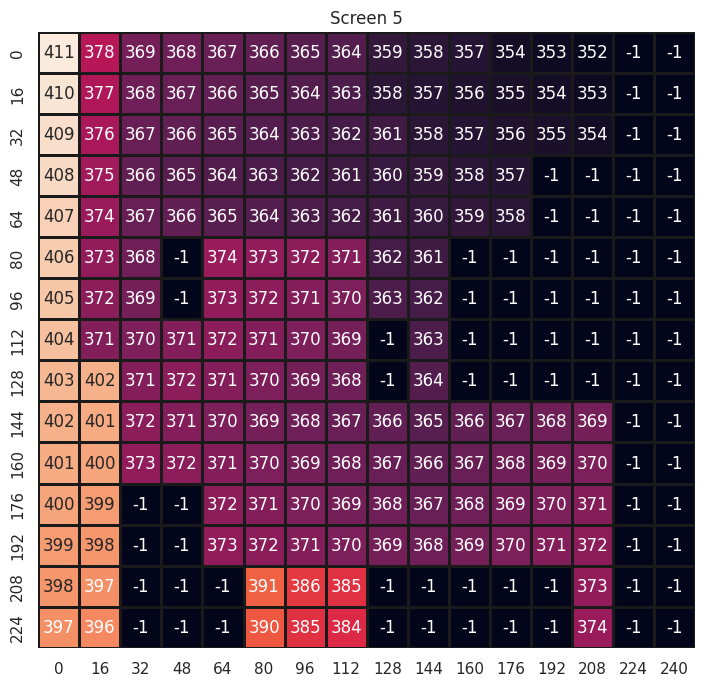

In [3]:
screen_grid = value_grid[y_start:y_end, x_start:x_end].copy()
wall_mask = screen_grid == -1
min_value = screen_grid[~wall_mask].min()
screen_grid[wall_mask] = min_value
screen_grid -= min_value
screen_grid[wall_mask] = -1

xticklabels = np.arange(screen_grid.shape[1]) * tile_size
yticklabels = np.arange(screen_grid.shape[0]) * tile_size

sns.heatmap(
    screen_grid,
    annot=value_grid[y_start:y_end, x_start:x_end],
    fmt="d",
    linewidths=1,
    linecolor="k",
    cbar=False,
    square=True,
    xticklabels=xticklabels,
    yticklabels=yticklabels,
)
plt.title(f"Screen {SCREEN}")
plt.show()

1. Reading from BizHawk, actual screen output is 256 x 224 (16 x 14 tiles) and screen starts vertically at half a tile at least in some areas (definitely screen 0), but it starts at a full tile horizontally;
2. Reading from RetroEnv, self.img is 240 x 224 (15 x 14 tiles);

Position: (128, 148)

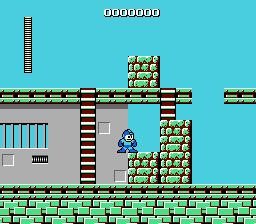

Actual (x, y) position for standby sprite (red dot under his mouth), which is 11 pixels up of his feet

